## Week 13: Lecture 2

We have been studying estimation. If we assume some properties of the samples, then can we predict other properties. Here we try to pass from known information to unknown information. So we will try to understand associations between properties of a sample to make predictions about associations between properties in the population. Associations have trends and patterns. We can use 

- scatter-plots 
- correlations

to assess the trends and patterns. Think of scatter-plots as a visual measure of association and correlation as a numerical measure of association. Following an exploration of some of the properties of correlation, we will connect scatter-plots and correlation. We will check that the correlation give the slope of the line that approximately connects the points in a scatter-plot .

In [1]:
# importing some packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# changing some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)

%matplotlib inline
plt.rcParams['figure.figsize'] = (9,7)

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# some helpful functions we wrote for you

from helper_functions import *

### Exercise (Grouping)

We have a dataset on the heights of families.

In [2]:
heights_extended = pd.read_csv('heights_extended.csv')
heights_extended

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


Compute the correlation between father height and child height.

In [3]:
def transform_to_standard_units(array):
    return (array - np.mean(array)) / np.std(array)

Remember that we need to convert to standard units.

In [4]:
father_height_standard_units = transform_to_standard_units(heights_extended["father"])
child_height_standard_units = transform_to_standard_units(heights_extended["childHeight"])

We can combine the transformed numbers into a table.

In [5]:
heights_standard_units = pd.DataFrame(data = { "father" : father_height_standard_units, "childHeight" : child_height_standard_units })
heights_standard_units

,father,childHeight
0,3.758511,1.804156
1,3.758511,0.686005
2,3.758511,0.630097
3,3.758511,0.630097
4,2.546465,1.888017
...,...,...
929,-2.907743,-0.767591
930,-2.907743,-1.326667
931,-2.907743,-1.606205
932,-2.705735,-0.068747


Now we can compute the correlation.

In [6]:
# access the values of the two variables

x = heights_standard_units["father"]
y = heights_standard_units["childHeight"]

# take the product 

product = x * y

# compute the average

r = np.mean(product)
r

0.26603853892271834

We can compare to the `pandas` function `corr`.

In [7]:
heights_standard_units.corr()

,father,childHeight
father,1.000000,0.266039
childHeight,0.266039,1.000000


Since 0.26 is positive we have a positive trend. We can try to determine the pattern by grouping.

In [8]:
grouped_heights = summarize_groups(heights_standard_units)
grouped_heights

,Median Father Height,Mean Child Height
Range of Father Heights,,
"(-2.909, -0.888]",-1.291681,-0.333543
"(-0.888, -0.0796]",-0.281643,-0.090389
"(-0.0796, 0.324]",0.324380,0.023032
"(0.324, 0.728]",0.728396,0.210585
"(0.728, 3.759]",1.415222,0.411287


Now we can plot all of the data in one chart.

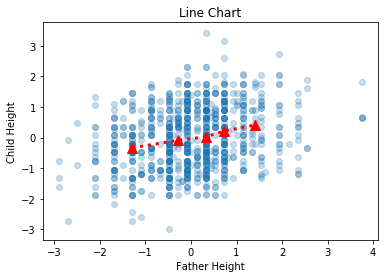

In [9]:
plt.scatter(heights_standard_units['father'], heights_standard_units["childHeight"], alpha = 0.25)
plt.plot(grouped_heights["Median Father Height"], grouped_heights["Mean Child Height"], "r^:", markersize = 10, lw = 3) 

plt.xlabel("Father Height")
plt.ylabel("Child Height")
plt.title("Line Chart");

We find a linear shape to the scatter-plot by connecting the five points in the summaries. What is the slope of the line? Is it related to the correlation?

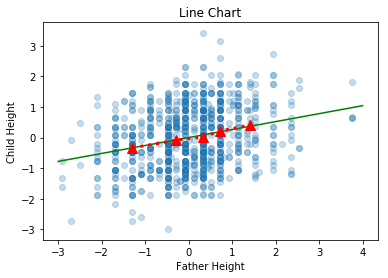

In [10]:
plt.scatter(heights_standard_units['father'], heights_standard_units["childHeight"], alpha = 0.25)
plt.plot(grouped_heights["Median Father Height"], grouped_heights["Mean Child Height"], "r^:", markersize = 10, lw = 3, zorder = 20) 

slope = 0.26 
xvalues = np.linspace(-3,4,50) 
plt.plot(xvalues, slope * xvalues, "g")

plt.xlabel("Father Height")
plt.ylabel("Child Height")
plt.title("Line Chart");

Here we plotted the line $$\large y = 0.26 \; x$$ The line is a good fit!

### Example (Correlation)

We use correlation to measure the association between variables with numbers. Before we calculate the correlation, we should understand the connection between the visualizations and the numbers. Below we have a widget showing scatter-plots with different correlations. Note the trends and patterns in the data.

In [11]:
correlation_widget()

interactive(children=(FloatSlider(value=0.0, description='r', max=1.0, min=-1.0), Output()), _dom_classes=('wi…

Remember that we compute correlation as the average of the product of the `x` variable and `y` variable in standard units. We can put the pieces together with a function called `compute_correlation`.

In [12]:
# compute correlation on table with columns x and y

def compute_correlation(table, x, y):    
    x_in_standard_units = transform_to_standard_units(table[x])
    y_in_standard_units = transform_to_standard_units(table[y])
    return np.mean(x_in_standard_units * y_in_standard_units)

For example we could have the following table

In [13]:
table = pd.DataFrame(data = {
        'x': [1, 2, 3, 4, 5, 6],
        'y': [2, 3, 1, 5, 2, 7]})
table 

,x,y
0,1,2
1,2,3
2,3,1
3,4,5
4,5,2
5,6,7


We compute the correlation 

In [14]:
compute_correlation(table, "x", "y")

0.6174163971897709

##### Switching Axes

Note that we can switch horizontal axis and vertical axis without changing the value of the correlation.

In [15]:
compute_correlation(table, 'y', 'x')

0.6174163971897709

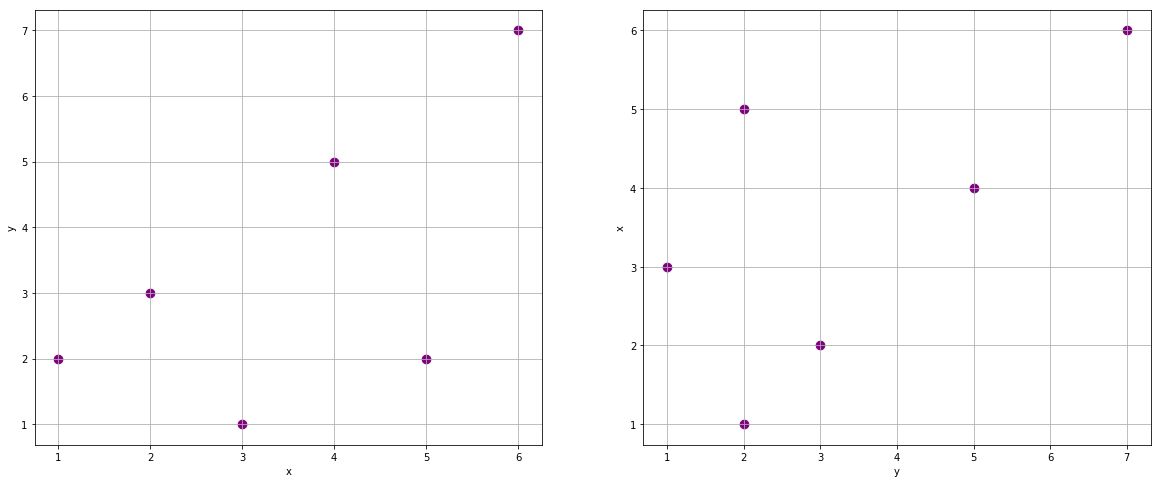

In [16]:
fig, ax = plt.subplots(ncols = 2, figsize = (20,8))

ax[0].scatter(table['x'], table['y'], s=75, color='purple')
ax[0].grid()
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].scatter(table['y'], table['x'], s=75, color='purple')
ax[1].grid()
ax[1].set_xlabel("y")
ax[1].set_ylabel("x");

##### Nonlinear Patterns

Suppose we had the following collection of data.

In [17]:
values = np.arange(-4,4.1, 0.5)
table = pd.DataFrame(data = {
        'x': values,
        'y': values**2})
table 

,x,y
0,-4.0,16.00
1,-3.5,12.25
2,-3.0,9.00
3,-2.5,6.25
4,-2.0,4.00
...,...,...
12,2.0,4.00
13,2.5,6.25
14,3.0,9.00
15,3.5,12.25


Note that we no longer have a linear pattern in the data.

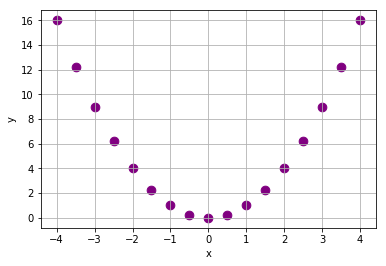

In [18]:
plt.scatter(table['x'], table['y'], s=75, color='purple')
plt.grid()
plt.xlabel("x")
plt.ylabel("y");

We can compute the correlation. The value is 0.

In [19]:
compute_correlation(table, 'x', 'y')

0.0

##### Outliers 

Note that outliers can throw off the value of the correlation.

In [20]:
table = pd.DataFrame(data = {
        'x': [1, 2, 3, 4],
        'y': [1, 2, 3, 4]})
table 

,x,y
0,1,1
1,2,2
2,3,3
3,4,4


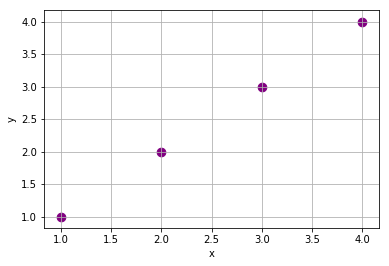

In [21]:
plt.scatter(table['x'], table['y'], s=75, color='purple')
plt.grid()
plt.xlabel("x")
plt.ylabel("y");

We find that the correlation is 1.

In [22]:
compute_correlation(table, 'x', 'y')

1.0

However, if we add an outlier, then the correlation will decrease.

In [23]:
table = pd.DataFrame(data = {
        'x': [1, 2, 3, 4, 5],
        'y': [1, 2, 3, 4, 0]})
table 

,x,y
0,1,1
1,2,2
2,3,3
3,4,4
4,5,0


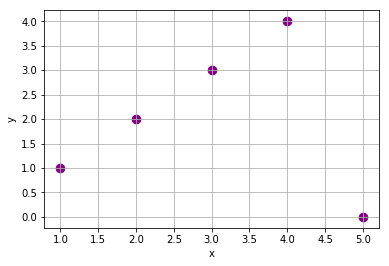

In [24]:
plt.scatter(table['x'], table['y'], s=75, color='purple')
plt.grid()
plt.xlabel("x")
plt.ylabel("y");

In [25]:
compute_correlation(table, 'x', 'y')

0.0

##### Sample Selection 

Suppose we have the following table.

In [26]:
table = pd.DataFrame(data = {
        'x': [0, 5, 0, 5],
        'y': [0, 0, 5, 5]})
table 

,x,y
0,0,0
1,5,0
2,0,5
3,5,5


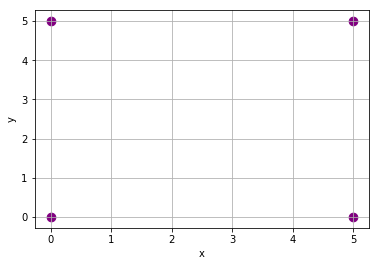

In [27]:
plt.scatter(table['x'], table['y'], s=75, color='purple')
plt.grid()
plt.xlabel("x")
plt.ylabel("y");

Note that the correlation is 0. 

In [28]:
compute_correlation(table, 'x', 'y')

0.0

Suppose we sampled from the table.

In [29]:
sampled_table = sample_without_replacement(3, table)
sampled_table

,x,y
0,0,0
2,0,5
1,5,0


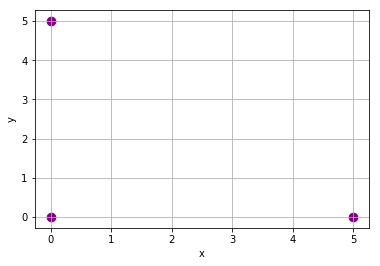

In [30]:
plt.scatter(sampled_table['x'], sampled_table['y'], s=75, color='purple')
plt.grid()
plt.xlabel("x")
plt.ylabel("y");

Now the correlation is -0.5. 

In [31]:
compute_correlation(sampled_table, 'x', 'y')

-0.5000000000000001

So the correlation of a sample and the correlation of a population might be different. With a random sample of large size, we expect the correlation of the sample to approximate the correlation of the population. However, if we select records for the 
sample without randomness then we might miss the trend in the population. For example suppose 

- `x` is SAT Reading Score 
- `y` is SAT Writing Score 

We computed 0 correlation in the population. However, colleges might set thresholds for combined scores 

$$ 5 \leq \text{SAT Reading Score} + \text{SAT Writing Score}$$

Here the correlation is -0.5. So colleges might incorrectly think the reading score and writing score have a negative trend!

##### Causality

Below we have a (fake) table containing information on reading comprehension and shoe size.

In [32]:
table = generate_reading_shoes_table()
table

,Reading Comprehension,Shoe Size
0,452.0,6.632832
1,498.0,3.412648
2,471.0,5.155402
3,745.0,6.978555
4,463.0,4.259275
...,...,...
995,483.0,6.719943
996,608.0,5.929068
997,517.0,5.134439
998,427.0,5.815747


We can generate a scatter-plot.

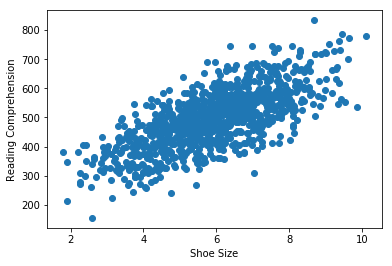

In [33]:
plt.scatter(table["Shoe Size"], table["Reading Comprehension"])
plt.xlabel("Shoe Size")
plt.ylabel("Reading Comprehension");

We have a positive trend and a linear pattern. The correlation happens to be 0.7. Here

- `Shoe Size` is explanatory variable
- `Reading Comprehension` is response variable

We have an association between the variables. Does shoe size cause reading comprehension?

### Example (Regression)

widget math and writing
equation of a line

show residuals
average square error

In [34]:
sat = pd.read_csv("sat2014.csv")
sat

,State,Participation Rate,Critical Reading,Math,Writing,Combined
0,North Dakota,2.3,612,620,584,1816
1,Illinois,4.6,599,616,587,1802
2,Iowa,3.1,605,611,578,1794
3,South Dakota,2.9,604,609,579,1792
4,Minnesota,5.9,598,610,578,1786
...,...,...,...,...,...,...
46,Texas,62.0,476,495,461,1432
47,Maine,95.6,467,471,449,1387
48,Idaho,100.0,458,456,450,1364
49,Delaware,100.0,456,459,444,1359


In [35]:
regression_widget(sat)

interactive(children=(FloatSlider(value=1.0, description='slope', max=1.25, min=0.75, step=0.01), FloatSlider(…

We learned that the correlation determines a good slope in standard units. 

$$\left( \displaystyle \frac{y - \text{mean y}}{\text{standard deviation y}}  \right)  = \text{correlation} \cdot \left( \displaystyle \frac{x - \text{mean x}}{\text{standard deviation x}}  \right)  $$

Rearranging the expression we get 

$$\begin{align} 
y = \text{mean y} + \displaystyle \frac{\text{correlaton} \cdot \text{standard deviation y}}{\text{standard deviation x}} \cdot \left( x - \text{mean x}\right) 
\end{align}$$

So we should take 

$$\text{slope} = \displaystyle \frac{\text{correlaton} \cdot \text{standard deviation y}}{\text{standard deviation x}} $$

We can solve for the intercept

$$\begin{align} 
y = \text{mean y} + \text{slope} \cdot \left( x - \text{mean x}\right) \\ 
= \left(\text{mean y} - \text{slope} \cdot \text{mean x}\right)  + \text{slope} \cdot x  
\end{align}$$

So we should take 

$$\text{intercept} = \text{mean y} - \text{slope} \cdot \text{mean x}$$


Now we can compute the slope and intercept.

In [37]:
correlation = compute_correlation(sat,"Math", "Writing")

mean_x = np.mean(sat["Math"])
mean_y = np.mean(sat["Writing"])


standard_deviation_x = np.std(sat["Math"])
standard_deviation_y = np.std(sat["Writing"])

slope = (correlation * standard_deviation_y) / standard_deviation_x
intercept = mean_y - slope * mean_x

In [38]:
print(f"The slope of the best fit line is {slope}")
print(f"The intercept of the best fit line is {intercept}")

The slope of the best fit line is 0.9342559312753932
The intercept of the best fit line is 15.397922765632131
